<a href="https://colab.research.google.com/github/anash18/4105-HW-Nash/blob/main/ECGR_4105_HW5/ECGR_4105_HW5_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.optim as optim

In [110]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,
                    3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])

#according to the textbook multiplying the tensor by 0.01 allows us
#to achieve the input not getting to far from the range of -1.0 to 1.0

t_un = 0.01 * t_u

#defining the model
def model(t_u, w2, w1, b):
  return w2 * t_u ** 2 + w1 * t_u + b

#defining the loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

#Setting up the initial parameters
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)

#testing my loss function
loss_test = loss_fn(model(t_un, *params), t_c)
loss_test.backward()

params.grad

tensor([ -8.4735, -12.6975, -19.3758])

In [111]:
#testing the optimizer

learning_rate_SGD1_test = 0.1
optimizer_SGD1_test = optim.SGD([params], lr=learning_rate_SGD1_test)

#prediction tensor
t_p_SGD_test = model(t_un, *params)
loss_SGD_test = loss_fn(t_p_SGD_test, t_c)

optimizer_SGD1_test.zero_grad()
loss_SGD_test.backward()
optimizer_SGD1_test.step()

params

tensor([1.8474, 2.2698, 1.9376], requires_grad=True)

In [112]:
#defining a training loop
def training_loop(n_epochs, optimizer, params, t_u, t_c):
  for epoch in range (1, n_epochs +1):

    if params.grad is not None:  # <1>
            params.grad.zero_()

    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
     print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params

In [100]:
#SGD Number 1 learning rate of 0.1
learning_rate_SGD1 = 0.1
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
optimizer_SGD1 = optim.SGD([params], lr=learning_rate_SGD1)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer_SGD1,
    params = params,
    t_u = t_un,
    t_c = t_c,
)

Epoch 500, Loss 2.108456
Epoch 1000, Loss 2.090728
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090721
Epoch 3000, Loss 2.090719
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090720
Epoch 5000, Loss 2.090720


tensor([ 28.3420,  24.7210, -10.6403], requires_grad=True)

In [101]:
#SGD Number 2 learning rate of 0.01
learning_rate_SGD2 = 0.01
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
optimizer_SGD2 = optim.SGD([params], lr=learning_rate_SGD2)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer_SGD2,
    params = params,
    t_u = t_un,
    t_c = t_c,
)

Epoch 500, Loss 26.266186
Epoch 1000, Loss 12.949670
Epoch 1500, Loss 6.968258
Epoch 2000, Loss 4.281574
Epoch 2500, Loss 3.074787
Epoch 3000, Loss 2.532740
Epoch 3500, Loss 2.289264
Epoch 4000, Loss 2.179901
Epoch 4500, Loss 2.130778
Epoch 5000, Loss 2.108713


tensor([ 27.9050,  24.3412, -10.3017], requires_grad=True)

In [102]:
#SGD Number 3 learning rate of 0.001
learning_rate_SGD3 = 0.001
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
optimizer_SGD3 = optim.SGD([params], lr=learning_rate_SGD3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer_SGD3,
    params = params,
    t_u = t_un,
    t_c = t_c,
)

Epoch 500, Loss 58.822189
Epoch 1000, Loss 48.348232
Epoch 1500, Loss 44.396774
Epoch 2000, Loss 41.118404
Epoch 2500, Loss 38.115955
Epoch 3000, Loss 35.345898
Epoch 3500, Loss 32.788918
Epoch 4000, Loss 30.428556
Epoch 4500, Loss 28.249678
Epoch 5000, Loss 26.238340


tensor([11.6079, 11.5393,  1.5983], requires_grad=True)

In [103]:
#SGD Number 4 learning rate of 0.0001
learning_rate_SGD4 = 0.0001
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
optimizer_SGD4 = optim.SGD([params], lr=learning_rate_SGD4)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer_SGD4,
    params = params,
    t_u = t_un,
    t_c = t_c,
)

Epoch 500, Loss 138.825058
Epoch 1000, Loss 118.428955
Epoch 1500, Loss 102.817139
Epoch 2000, Loss 90.845161
Epoch 2500, Loss 81.642403
Epoch 3000, Loss 74.546761
Epoch 3500, Loss 69.054512
Epoch 4000, Loss 64.782639
Epoch 4500, Loss 61.439720
Epoch 5000, Loss 58.804115


tensor([3.7440, 4.8014, 4.9612], requires_grad=True)

In [104]:
#Adam Number 1 learning rate of 0.1
learning_rate_adam1 = 0.1
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
optimizer_adam1 = optim.Adam([params], lr=learning_rate_adam1)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer_adam1,
    params = params,
    t_u = t_un,
    t_c = t_c,
)

Epoch 500, Loss 7.720606
Epoch 1000, Loss 2.183957
Epoch 1500, Loss 2.105043
Epoch 2000, Loss 2.103428
Epoch 2500, Loss 2.101665
Epoch 3000, Loss 2.099716
Epoch 3500, Loss 2.097688
Epoch 4000, Loss 2.095724
Epoch 4500, Loss 2.093984
Epoch 5000, Loss 2.092600


tensor([ 29.6354,  23.3667, -10.3189], requires_grad=True)

In [105]:
#Adam Number 2 learning rate of 0.01
learning_rate_adam2 = 0.01
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
optimizer_adam2 = optim.Adam([params], lr=learning_rate_adam2)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer_adam2,
    params = params,
    t_u = t_un,
    t_c = t_c,
)

Epoch 500, Loss 57.949375
Epoch 1000, Loss 40.551365
Epoch 1500, Loss 33.974369
Epoch 2000, Loss 27.274963
Epoch 2500, Loss 20.752810
Epoch 3000, Loss 14.940594
Epoch 3500, Loss 10.199280
Epoch 4000, Loss 6.687758
Epoch 4500, Loss 4.367293
Epoch 5000, Loss 3.038020


tensor([27.2414, 19.8351, -7.6692], requires_grad=True)

In [106]:
#Adam Number 3 learning rate of 0.0001
learning_rate_adam3 = 0.0001
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
optimizer_adam3 = optim.Adam([params], lr=learning_rate_adam3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer_adam3,
    params = params,
    t_u = t_un,
    t_c = t_c,
)

Epoch 500, Loss 163.438293
Epoch 1000, Loss 161.446915
Epoch 1500, Loss 159.478012
Epoch 2000, Loss 157.530380
Epoch 2500, Loss 155.602768
Epoch 3000, Loss 153.694489
Epoch 3500, Loss 151.804749
Epoch 4000, Loss 149.932922
Epoch 4500, Loss 148.078751
Epoch 5000, Loss 146.241913


tensor([1.4952, 1.4946, 0.4935], requires_grad=True)

In [107]:
#Adam Number 4 learning rate of 0.00001
learning_rate_adam4 = 0.00001
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
optimizer_adam4 = optim.Adam([params], lr=learning_rate_adam4)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer_adam4,
    params = params,
    t_u = t_un,
    t_c = t_c,
)

Epoch 500, Loss 165.247131
Epoch 1000, Loss 165.044571
Epoch 1500, Loss 164.842194
Epoch 2000, Loss 164.640030
Epoch 2500, Loss 164.438049
Epoch 3000, Loss 164.236237
Epoch 3500, Loss 164.034607
Epoch 4000, Loss 163.833160
Epoch 4500, Loss 163.631897
Epoch 5000, Loss 163.430771


tensor([1.0501, 1.0501, 0.0499], requires_grad=True)

In [108]:
#BEST PARAMETERS :D

#SGD Number 1 learning rate of 0.1
learning_rate_SGD1 = 0.1
params = torch.tensor([1.0, 1.0, 0.0], requires_grad = True)
optimizer_SGD1 = optim.SGD([params], lr=learning_rate_SGD1)

optimal_params = training_loop(
    n_epochs = 5000,
    optimizer = optimizer_SGD1,
    params = params,
    t_u = t_un,
    t_c = t_c,
)

print("\nThe best parameters for this problem were from the SGD with a learning rate of 0.1 which \ngave: \n", optimal_params)

Epoch 500, Loss 2.108456
Epoch 1000, Loss 2.090728
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090721
Epoch 3000, Loss 2.090719
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090720
Epoch 5000, Loss 2.090720

The best parameters for this problem were from the SGD with a learning rate of 0.1 which 
gave: 
 tensor([ 28.3420,  24.7210, -10.6403], requires_grad=True)


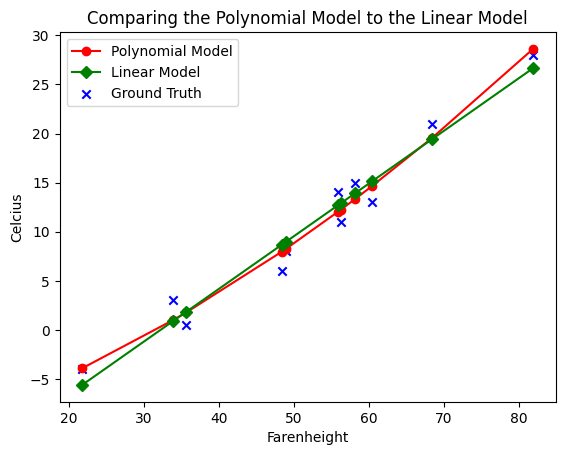

In [115]:
#Time to plot much like someone in an autocad drawing trying to print out a piece of paper

final_p = model(0.01 * t_u, *optimal_params)
w1_slides = 5.3671
b_slides = -17.3012
p_slides = (w1_slides * (0.1 * t_u) + b_slides)

#reordering to make the graph look pretty O_- <- this is a winky face
t_un_order, index = torch.sort(t_u)
final_p_order, index = torch.sort(final_p)
final_slides_order, index = torch.sort(p_slides)

plt.plot(t_un_order.detach().numpy(), final_p_order.detach().numpy(), label = "Polynomial Model", c = "r", marker = "o")
plt.plot(t_un_order.detach().numpy(), final_slides_order.detach().numpy(), label = "Linear Model", c = 'g', marker = "D")
plt.scatter(t_u.detach().numpy(), t_c.detach().numpy(), label = "Ground Truth", c = 'b', marker = 'x')
plt.xlabel("Farenheight")
plt.ylabel("Celcius")
plt.legend()
plt.title("Comparing the Polynomial Model to the Linear Model")
plt.show()